In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Imporando bilbiotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Criando o caminho do Arquivo
data_path = "/content/drive/MyDrive/Code/Myrep/Car_sales/Datasets/dbr.csv"
db = pd.read_csv(data_path)
db.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,1,1,1,1,1,88.6,168.8,64.1,48.8,...,130,1,1,1,1,111,5000,21,27,1
1,1,1,1,1,1,1,88.6,168.8,64.1,48.8,...,130,1,1,1,1,111,5000,21,27,2
2,1,1,1,2,1,1,94.5,171.2,65.5,52.4,...,152,1,2,2,1,154,5000,19,26,2
3,1,1,2,3,2,1,99.8,176.6,66.2,54.3,...,109,1,3,3,2,102,5500,24,30,3
4,1,1,2,3,3,1,99.4,176.6,66.4,54.3,...,136,1,3,3,3,115,5500,18,22,4


In [3]:
# Definindo as variáveis independentes (X) e a variável alvo (y)
X = db.drop('price', axis=1)  # Todas as variáveis exceto 'price'
y = db['price']  # Variável alvo 'price'


In [4]:
# Importando uma biblioteca de padronização.
from sklearn.preprocessing import StandardScaler

# A padronização envolve subtrair a média e dividir pelo desvio padrão de cada variável, o que coloca as variáveis na mesma escala. Ou seja é o valor Z.
scaler = StandardScaler()
scaler.fit(X)
x_scaled = scaler.transform(X) # Ela ajuda a garantir que as variáveis tenham uma escala comum, o que pode melhorar o desempenho do modelo.

In [5]:
# importando os módulos para execução da regressão.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Dividindo os dados em conjuntos de treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=91)

# Criando e treinando o modelo de regressão linear múltipla
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse.round(3))
print('R-squared (R²):', r2.round(3))

# Adicionando uma constante para o modelo
X_train_with_const = sm.add_constant(X_train)

# Criando e treinando o modelo usando statsmodels
model_sm = sm.OLS(y_train, X_train_with_const).fit()

# Obtendo o sumário do modelo
summary = model_sm.summary()
print(summary)


Mean Squared Error (MSE): 1990.973
R-squared (R²): 0.341
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3.733
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           9.26e-07
Time:                        20:52:28   Log-Likelihood:                -851.22
No. Observations:                 164   AIC:                             1748.
Df Residuals:                     141   BIC:                             1820.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [6]:
# tirando a raiz quadrada do erro médio quadrado faz com que o o valor se torne simbólicamente interpretável.
raiz= np.sqrt(mse)
raiz.round(3)

44.62

O modelo obteve um bom desempenho, uma vez que o valor de R² indica que mais de 87% da variabilidade na variável de preço está sendo explicada ou correlacionada com as demais variáveis. O erro, que geralmente está por volta de 3000, depende da escala da variável alvo e parece estar dentro de um valor plausível.

In [7]:
# Aqui podemos verificar o coeficiente gerado pela regressão para cada parâmetro.
print("Coefficient:", model.coef_.round(3))

Coefficient: [  0.892  -0.444   7.568  -0.554  -3.095   0.4   -13.086   5.456   7.766
   6.584  -3.96   -2.151  -7.551 -26.553 -13.347  13.562  13.5     7.338
  21.602 -15.36   16.228 -13.259]


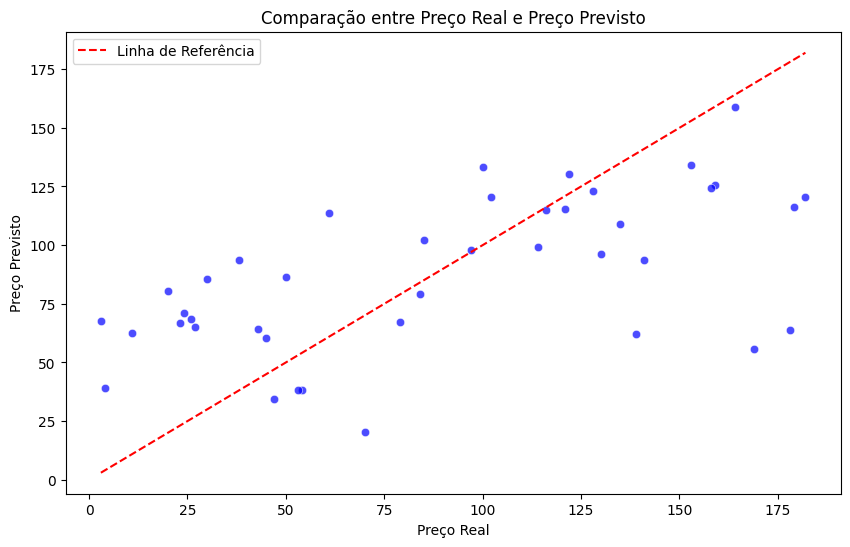

In [8]:
# Plotando uma gráfico para comparar o modelo.

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7)  # Scatter plot para previsões
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Linha de Referência')
plt.xlabel('Preço Real')
plt.ylabel('Preço Previsto')
plt.title('Comparação entre Preço Real e Preço Previsto')
plt.legend()
plt.show()


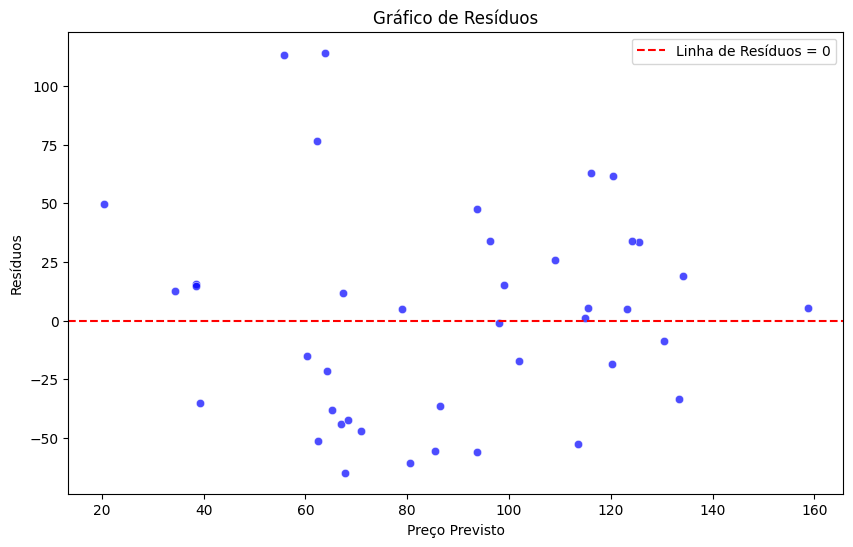

In [9]:
# Calculando os resíduos
residuals = y_test - y_pred

# Criando o gráfico de dispersão dos resíduos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', label='Linha de Resíduos = 0')
plt.xlabel('Preço Previsto')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.legend()
plt.show()

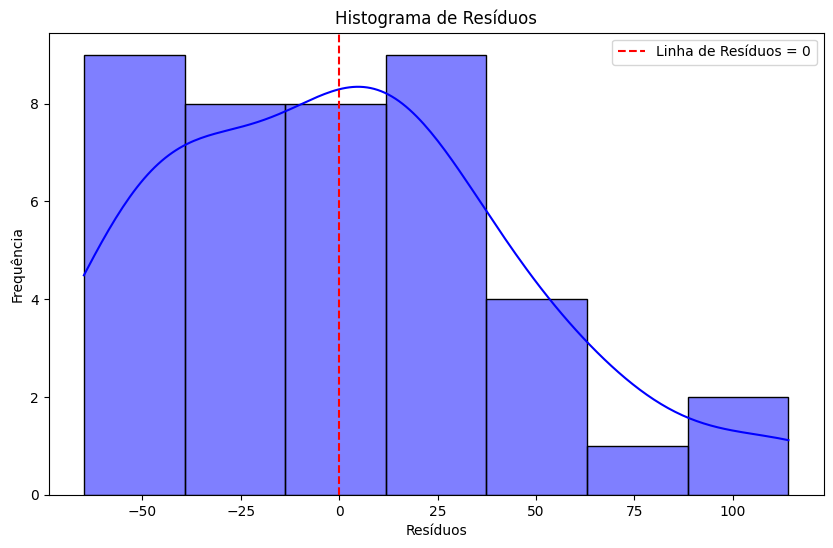

In [10]:
# Calculando os resíduos
residuals = y_test - y_pred

# Criando o histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.axvline(x=0, color='red', linestyle='--', label='Linha de Resíduos = 0')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma de Resíduos')
plt.legend()
plt.show()


In [11]:
print("Intercepto:", model.intercept_.round(3))

Intercepto: 91.6


Os resíduos gerados na regressão apresentam uma curva aproximadamente normal, o que é o comportamento esperado, e isso sugere uma boa performance do modelo. O valor do intercepto também se aproxima do valor esperado. A seguir, criei outro modelo, eliminando variáveis com base nos P-valores do primeiro modelo.

In [12]:
# Definindo as variáveis independentes (X) e a variável alvo (y)
X_2 = db[['drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'fuelsystem', 'boreratio',
       'horsepower', 'citympg', 'highwaympg']]  # Todas as variáveis de impacto segundo a matriz de correlação
y = db['price']  # Variável alvo 'price'

# Realizando  a padronização em termos do desvio padrão.
scaler = StandardScaler()
scaler.fit(X_2)
x_scaled_2 = scaler.transform(X_2)

# Dividindo os dados em conjuntos de treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(x_scaled_2, y, test_size=0.2, random_state=91)

# Criando e treinando o modelo de regressão linear múltipla
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazendo previsões
y_pred_2 = modelo.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred_2)
r2 = r2_score(y_test, y_pred_2)

print('Mean Squared Error (MSE):', mse.round(3))
print('R-squared (R²):', r2.round(3))

# Adicionando uma constante para o modelo
X_train_with_const = sm.add_constant(X_train)

# Criando e treinando o modelo usando statsmodels
modelo_sm = sm.OLS(y_train, X_train_with_const).fit()

# Obtendo o sumário do modelo
summary = modelo_sm.summary()
print(summary)


Mean Squared Error (MSE): 2489.255
R-squared (R²): 0.176
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     2.902
Date:                Mon, 08 Apr 2024   Prob (F-statistic):            0.00122
Time:                        20:52:29   Log-Likelihood:                -871.84
No. Observations:                 164   AIC:                             1770.
Df Residuals:                     151   BIC:                             1810.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Em comparação ao primeiro modelo, é possível observar uma redução do valor absoluto do MSE, o que é um indicador de melhor desempenho. O valor de R² também obteve melhor desempenho, aproximando-se de 1.

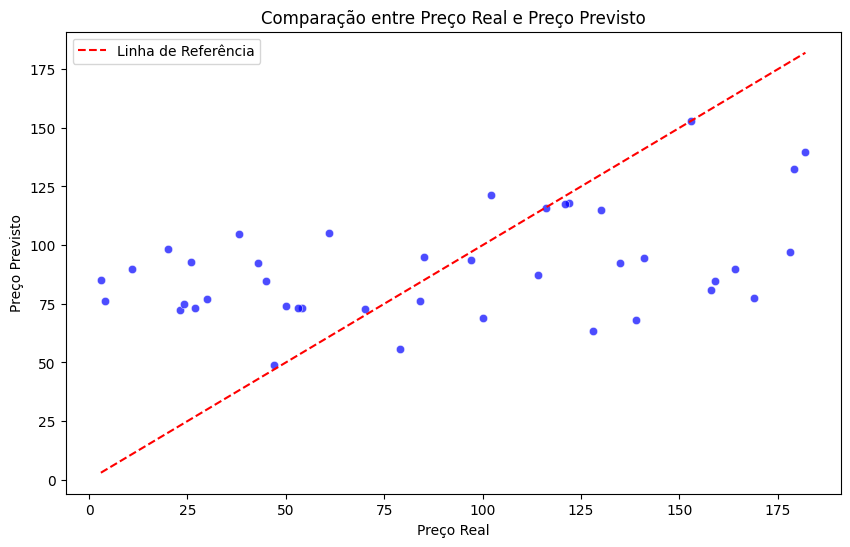

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y= y_pred_2, color='blue', alpha=0.7)  # Scatter plot para previsões
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Linha de Referência')
plt.xlabel('Preço Real')
plt.ylabel('Preço Previsto')
plt.title('Comparação entre Preço Real e Preço Previsto')
plt.legend()
plt.show()


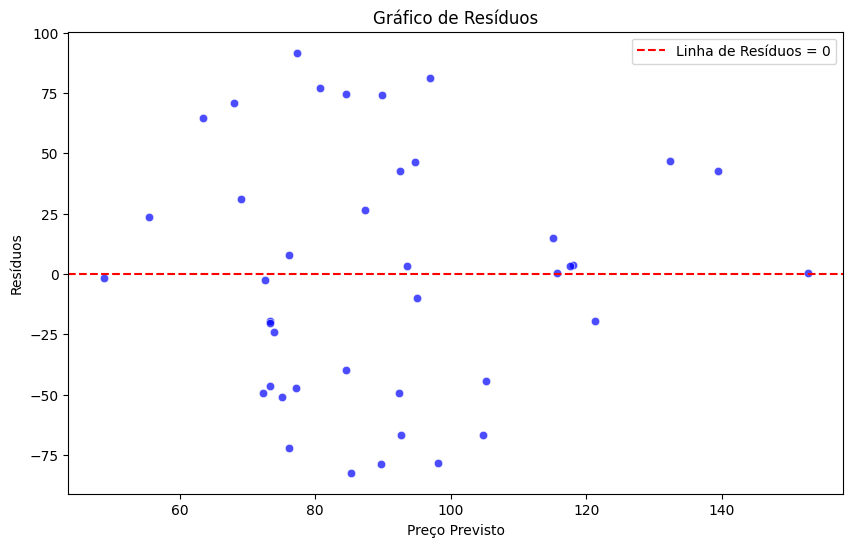

In [14]:
# Calculando os resíduos
residuo = y_test - y_pred_2

# Criando o gráfico de dispersão dos resíduos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_2, y=residuo, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', label='Linha de Resíduos = 0')
plt.xlabel('Preço Previsto')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.legend()
plt.show()


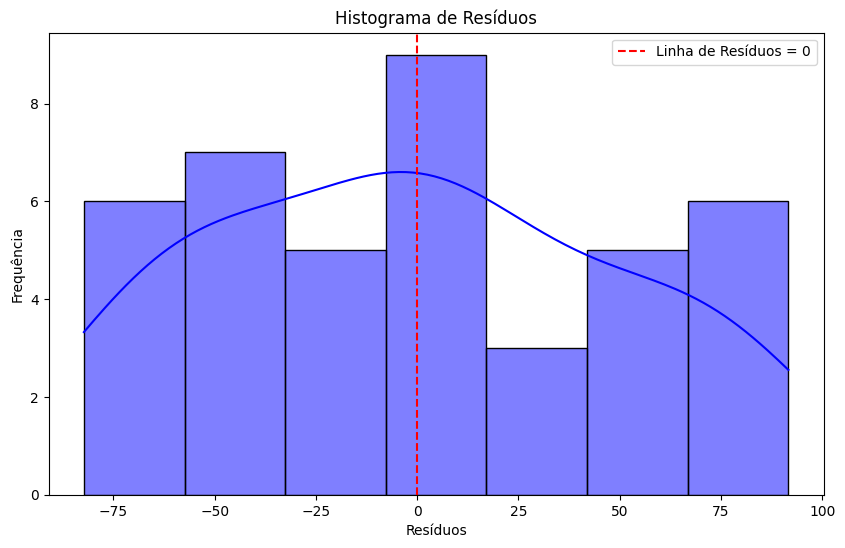

In [15]:
# Criando o histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuo, kde=True, color='blue')
plt.axvline(x=0, color='red', linestyle='--', label='Linha de Resíduos = 0')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma de Resíduos')
plt.legend()
plt.show()


In [16]:
print("Coefficient:", modelo.coef_.round(3))

Coefficient: [  1.642   3.164  -0.938  22.546  -7.576   7.515 -21.105 -12.901  16.874
   8.968  34.148 -20.351]


In [17]:
print("Intercepto:", modelo.intercept_.round(3))

Intercepto: 92.117


Embora o incremento em R² e a redução do MSE possam não ter sido significativos, o gráfico de resíduos mostra uma melhor aproximação com a distribuição normal, indicando que o modelo alternativo, que utiliza menos variáveis, de fato apresenta um melhor desempenho em comparação com o primeiro modelo, que utiliza todas as variáveis. A baixo segue uma tabela com algumas previsões e estatísticas.

In [18]:
# Fazendo previsões no conjunto de teste
y_pred_2 = modelo.predict(X_test)

# Criando o DataFrame pf_df
pf_df = pd.DataFrame()
pf_df['Preco'] = y_test.values  # Convertendo para array para evitar o erro de comprimento
pf_df['Previsao'] = y_pred_2.round(2)
pf_df['Residuo'] = (pf_df['Preco'] - pf_df['Previsao']).round(2)
pf_df['Diferenca_em_%'] = (np.absolute((pf_df['Preco'] - pf_df['Previsao']) / pf_df['Preco'] * 100)).round(2)

# Exibindo o DataFrame pf_df
print(pf_df.head(10))


   Preco  Previsao  Residuo  Diferenca_em_%
0    122    118.09     3.91            3.20
1    114     87.29    26.71           23.43
2     23     72.37   -49.37          214.65
3     30     77.11   -47.11          157.03
4    128     63.45    64.55           50.43
5     84     76.10     7.90            9.40
6    179    132.37    46.63           26.05
7     79     55.53    23.47           29.71
8      3     85.31   -82.31         2743.67
9     24     75.12   -51.12          213.00


In [19]:
pf_df.describe().round(2)

,Preco,Previsao,Residuo,Diferenca_em_%
count,41.00,41.00,41.00,41.00
mean,89.37,90.39,-1.02,191.47
std,55.65,22.33,50.50,506.10
min,3.00,48.80,-82.31,0.16
25%,43.00,73.95,-46.28,18.88
50%,85.00,87.29,0.25,45.21
75%,135.00,98.14,42.50,114.72
max,182.00,152.75,91.67,2743.67
